In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
import sklearn
import numpy as np

In [26]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)

X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target

set_or_versi = (y == 0) | (y == 1)

X = X[set_or_versi]
y = y[set_or_versi]

In [27]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C, alpha = 5, 0.05

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_svc = LinearSVC(loss='hinge', C=C).fit(X_scaled, y)
svc_clf = SVC(kernel='linear', C=C).fit(X_scaled, y)
sdg_clf = SGDClassifier(loss='hinge', alpha=alpha).fit(X_scaled, y)


In [37]:
def compute_boundaries(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]  
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

lin_svc_line = compute_boundaries(lin_svc)
svc_clf_line = compute_boundaries(svc_clf)
sdg_clf_line = compute_boundaries(sdg_clf)

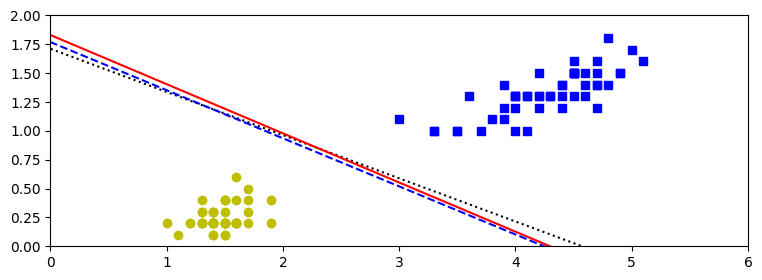

In [ ]:
plt.figure(figsize=(9,3))
plt.plot(lin_svc_line[:, 0], lin_svc_line[:, 1], 'k:')
plt.plot(svc_clf_line[:, 0], svc_clf_line[:, 1], 'r-')
plt.plot(sdg_clf_line[:, 0], sdg_clf_line[:, 1], 'b--')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs')
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo')
plt.axis([0,6,0,2])
plt.show()